Please perform the following exercises, each of which is worth $10$ points.  The instructions for most can be found at the end of the Chapter notes, however several include additional information / starter code which is provided below.

 - **Chapter 7:** Exercises: 2, 3, and 5
 
 - **Chapter 8:** Exercises: 1, 2, and 4

Note: in completing Exercises $3$ and $5$ of Chapter 7 and Exercise 5 of Chapter 8 you may want to *flatten* your cost function prior to minimizing it since both the multi-class model and the Linear Autoencoder take in a **matrix** of weights.  You can find instructinos about how to do this via `autograd` in the attached Jupyter notebook called `flattening_functions_using_autograd.ipynb`.

In [10]:
# import autograd / numpy necessities
from autograd import numpy as np
from autograd import grad 
import math
import matplotlib.pyplot as plt
# set path to datasets
datapath = 'datasets/'

# Chapter 7 Exercise 2

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3]
9


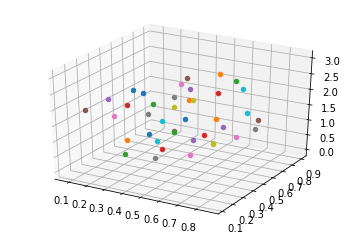

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
   3.  3.  3.  3.]]


In [11]:
# location of dataset
import math 
from mpl_toolkits.mplot3d import Axes3D

csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
w=np.array([2.0,2.0,3.0])
# get input/output pairs
x = data[:-1,:]
y = data[-1:,:]
yp=y

def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

def fusion_rule(x,w):
    return np.argmax(model(x,w))

def softmax(w):
    global yp
    cost = np.sum(np.log(1 + np.exp(-yp*model(x,w)))) 
    return cost/float(np.size(yp))


def least_squares(w):
    global yp
    cost=np.sum((model(x,w)-yp)**2)
    return cost/float(x.size)

def PerceptronCost(w):
    global yp
    temp=-yp*model(x,w)
    cost=0
    for i in range(0,len(temp[0])):
        if temp[0][i]>0:
            cost+=temp[0][i]
    return cost/float(np.size(yp))


def dealwithyp(yy,label):
    a=np.random.randint(0, 1, (1, 40))
    for i in range(0,len(yy[0])):
        if yy[0][i]==label:
            a[0][i]=1
        else:
            a[0][i]=-1
    return a


WeightDic={}
CostDic={}



for i in range(0,4):
    yp=dealwithyp(y,i)
    w1,CostDic[i]=gradient_descent(softmax,0.1,1000,w)
    WeightDic[i]=w1[-1]



www=np.array([WeightDic[0],WeightDic[1],WeightDic[2],WeightDic[3]])




result=[]
for i in range(0,40):
    result.append(fusion_rule(x[:,i],www.T))
print(result)

error=0
for i in range(0,40):
    if result[i]!=y[0][i]:
        error+=1
print(error)



def d3_points():

        

    fig = plt.figure() # 得到画面
    ax = fig.gca(projection='3d') # 得到3d坐标的图
    # 画点
    
    for i in range(0,40):
        ax.scatter(x[0][i],x[1][i],y[0][i])
    plt.show()
    
d3_points()
print(y)










In [12]:
print (y)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  2.  2.  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.
   3.  3.  3.  3.]]


# Chapter 7 Exercise 3 and 5

In [13]:
# location of dataset

from autograd.misc.flatten import flatten_func
csvname = datapath + '3class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 
w=np.array([[2.0,2.0,3.0],[2.0,2.0,3.0],[2.0,2.0,3.0]])

def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T
lam = 10**-5  # our regularization paramter 

def multiclass_perceptron(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    # compute maximum across data points
    a = np.max(all_evals,axis = 0)    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)

    # return average
    return cost/float(np.size(y))


weight,cost=gradient_descent(multiclass_perceptron,0.1,1000,w)

print(weight[-1])

def fusion_rule(x,w):
    return np.argmax(model(x,w))

result=[]
for i in range(0,30):
    result.append(fusion_rule(x[:,i],weight[-1]))
print(result)

error=0
for i in range(0,30):
    if result[i]!=y[0][i]:
        error+=1
print(error)



#EX5
csvname = datapath + '4class_data.csv'
data = np.loadtxt(csvname,delimiter = ',')
w=np.array([[2.0,2.0,3.0],[2.0,2.0,3.0],[2.0,2.0,3.0],[2.0,2.0,3.0]])
# get input/output pairs
x = data[:-1,:]
y = data[-1:,:] 


lam = 10**(-5)  # our regularization paramter 
def multiclass_softmax(w):        
    # pre-compute predictions on all points
    all_evals = model(x,w)
    
    # compute softmax across data points
    a = np.log(np.sum(np.exp(all_evals),axis = 0)) 
    
    # compute cost in compact form using numpy broadcasting
    b = all_evals[y.astype(int).flatten(),np.arange(np.size(y))]
    cost = np.sum(a - b)
    
    # add regularizer
    cost = cost + lam*np.linalg.norm(w[1:,:],'fro')**2
    
    # return average
    return cost/float(np.size(y))


weight,cost=gradient_descent(multiclass_softmax,0.1,1000,w)

print(weight[-1])

def fusion_rule(x,w):
    return np.argmax(model(x,w))

result=[]
for i in range(0,40):
    result.append(fusion_rule(x[:,i],weight[-1]))
print(result)

error=0
for i in range(0,40):
    if result[i]!=y[0][i]:
        error+=1
print(error)
















[[ 2.38333333  2.26666667  2.35      ]
 [ 2.0981993   2.47022398  2.43157672]
 [ 2.39003363  2.37200245  2.23796391]]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
0


ValueError: shapes (40,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

In [ ]:
print (y)

# Chapter 8 Exercise 2 and 4

In [14]:
import matplotlib.pyplot as plt
import numpy as np1

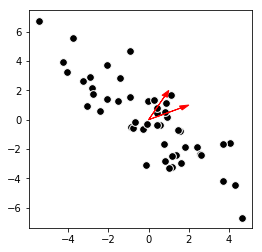

[[ -3.03009465e-01   4.33665613e+00   2.02505306e+00   2.76049966e+00
    7.71588029e-01   7.08769805e-01  -5.22975996e+00  -1.59413750e+00
    3.50521282e+00  -3.79359401e+00   2.51056453e+00  -3.75579413e-01
    2.43727098e+00   1.75657048e-01   1.15842107e+00  -3.49932559e-01
   -1.45887530e-01  -8.08662001e-02   5.49238706e+00  -8.63632551e-01
   -1.76229097e+00   1.16150912e-01  -1.44044443e-01   6.57111219e-02
    1.15274848e+00  -2.25820301e+00   2.07669244e+00   3.58986104e-01
   -1.79683395e+00  -2.04189412e+00  -1.77341660e+00  -2.23503324e+00
   -1.21856269e+00   1.37589210e+00   1.76883800e+00  -2.19173959e+00
    1.00412414e+00  -3.48816652e+00  -8.04821683e-01  -2.07893411e+00
    7.42665902e-01  -1.46223696e-01   4.46189643e-01  -2.13825311e+00
   -1.88815289e+00   3.05612962e+00  -1.95420835e+00   3.04015573e+00
   -1.81034464e+00   1.38115904e+00]
 [ -1.82903888e-03  -3.74232743e+00  -2.24420936e+00  -2.21222154e+00
   -3.47774689e-01   2.19750569e-01   4.54313047e+00 

/Applications/Anaconda2/anaconda/envs/py36/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in multiply
  return f_raw(*args, **kwargs)
/Applications/Anaconda2/anaconda/envs/py36/lib/python3.6/site-packages/autograd/core.py:205: RuntimeWarning: invalid value encountered in add
  def _mut_add(self, x, y):    x += y; return x


[ nan  nan]


In [15]:
# location of dataset
csvname = datapath + '2d_span_data_centered.csv'

# load in dataset
X = np.loadtxt(csvname,delimiter = ',')
x=X
# plot dataset
figure = plt.figure(figsize = (4,4))
plt.scatter(X[0,:],X[1,:],s=60,c='k',edgecolor='w')



plt.arrow(0, 0, 1, 2, length_includes_head=True, head_width=0.3,color='r')
plt.arrow(0, 0, 2, 1, length_includes_head=True, head_width=0.3,color='r')

plt.show()
#Execrcise2:

def costFunc(w):
    cost=0
    for i in range(0,len(x[0])):
        temp=np.dot(C,w[:,i])-x[:,i]
        sum=0
        for j in temp:
            sum+=j*j
        cost+=sum

    return cost/float(x.size)
    
C=np.array([[1,2],[2,1]])
w=np.zeros((2,x.size))
w+=1

weight,cost=gradient_descent(costFunc,0.1,1000,w)




Prediction=X
for i in range(0,len(Prediction[0])):
    Prediction[:,i]=weight[-1][:,i]


figure = plt.figure(figsize = (4,4))
plt.scatter(Prediction[0,:],Prediction[1,:],s=60,c='k',edgecolor='w')
plt.arrow(0, 0, 1, 0, length_includes_head=True, head_width=0.2,color='r')
plt.arrow(0, 0, 0, 1, length_includes_head=True, head_width=0.2,color='r')    


#print(np.dot(C*C.T,X[:,1]))


#print(C*C.T*X[:,1]-X[:,1])
#print(X[:,1])

#Exercise4
C=np1.array([2.0,1.0])
TT=np.dot(np.dot(C.T, C), X[:,1])
print(x)

def cF(C):
    cost=0
    for i in range(0,len(x[0])):
        temp=np1.dot(C.T,x[:,i])
        temp=np1.dot(C,temp)
        temp-=x[:,i]
        sum=0
        for j in temp:
            sum+=j*j
        cost+=sum

    return cost/float(x.size)


weight,cost=gradient_descent(cF,0.1,1000,C)
print(weight[-1])






        













